# Load images from new Echelle

## Imports and Setup

In [1]:
%matplotlib inline

In [3]:
# Don't know how to import locally, so I just use %run
%run ../src/echelle_spectra/tools/echelle.py

In [5]:
files_cmos = {
    "orders": "pattern_cmos.txt",
    "wavelength": "Th_wavelength_CMOS.txt",
    "sphr": "sphere_CMOS.sif",
    "bkgr": "sphere_CMOS_bkg.sif",
    "integral": "integrating_sphere.txt",
}
files_ccd = {
    "orders": "pattern.txt",
    "wavelength": "Th_wavelength.txt",
    "sphr": "absolute_20170613_b8_0.2_v2.sif",
    "bkgr": "absolute_20170613_b8_0.2_bkg.sif",
    "integral": "integrating_sphere.txt",
}
bpth = '../src/echelle_spectra/resources/calibration_files'

In [7]:
%run ../src/echelle_spectra/tools/echelle.py
cb = Calibrations(bpth,files_cmos)

In [11]:
th = EchelleImage(os.path.join(bpth,'ThAr_10.0s_16bit.sif'),clbr=cb)

In [22]:
cb.load_pattern()
cb.load_sphere()
cb.make_cutting_masks()
cb.wavelength_calibration()

In [23]:
cb.calculate_order_borders()

ValueError: cannot reshape array of size 221577 into shape (3,29,2560)

In [27]:
cb.orders_bad_froms

array([2560])

In [ ]:
def correct_order_shapes(clbr):
    """
    Correction of the short orders (28th for CMOS camera)
    fill spectra with np.nan to make a np.array with all orders spectra
    """
    # Do nothing if there are no np.nan's in orders spectra
    if not len(clbr.orders_bad_shape):
        return

    frames = range(clbr.sphr.info["NumberOfFrames"])

    for o, i in zip(clbr.orders_bad_shape, clbr.orders_bad_froms):
        # print(o,i)
        lnan = clbr.DIMW - self.order_spectra[0][o].shape[0]
        nans = np.ones(lnan) * np.nan
        for fi in frames:
            # self.order_spectra[fi][o][np.isnan(clbr.order_wavel[o])] = np.nan
            self.order_spectra[fi][o] = np.append(self.order_spectra[fi][o], nans)

    self.order_spectra = np.hstack(np.hstack(self.order_spectra)).reshape(
        self.info["NumberOfFrames"], clbr.pattern.shape[1], clbr.DIMW
    )


In [ ]:
np.setdiff1d(spectra_shapes, lambda_shapes)

In [32]:
import matplotlib.pyplot as plt

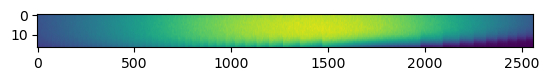

In [37]:
plt.imshow(cb.sphr.order_image(0,0),aspect=10)

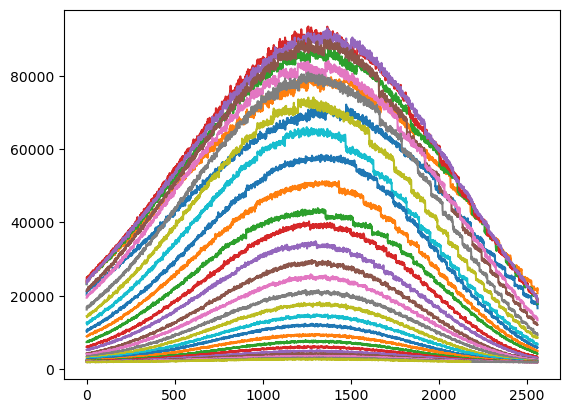

In [48]:
for i in range(29):
    plt.plot(cb.sphr.order_spectra[0][i])

In [49]:
import numpy as np

In [60]:
spectra_shapes = np.array([s.shape[0] for s in cb.sphr.order_spectra[0]])
lambda_shapes = np.array([ow.shape[0] for ow in cb.order_wavel])

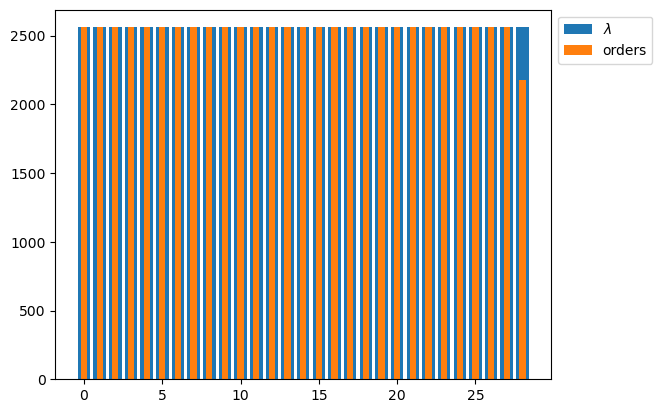

In [71]:
plt.bar(range(29),lambda_shapes,label='$\lambda$')
plt.bar(range(29),spectra_shapes,width=0.4,label='orders')
plt.legend(bbox_to_anchor=[1,1])